# V Nagasai (CS20B1016)

In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

## MIN-CUT ALGORITHM

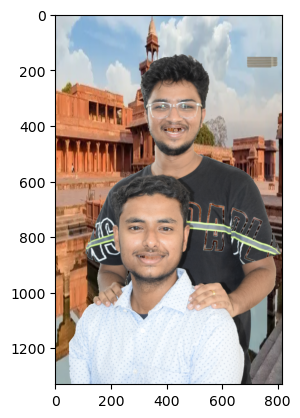

In [4]:
def image_segmentation(image_path):
    # Load the image
    img = cv2.imread(image_path)
    mask = np.zeros(img.shape[:2],np.uint8)

    # Define the rectangular region of interest (ROI)
    rect = (50, 50, img.shape[1]-50, img.shape[0]-50)

    # Initialize background and foreground models
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)

    # Apply GrabCut algorithm
    cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

    # Create a mask where sure and likely foreground pixels are marked as 1
    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')

    # Multiply the original image with the mask to get the segmented image
    segmented_img = img * mask2[:, :, np.newaxis]

    return segmented_img

your_image_segmented = image_segmentation('me.png')
historical_place_image = cv2.imread('2.webp')

historical_place_image = cv2.resize(historical_place_image, (your_image_segmented.shape[1], your_image_segmented.shape[0]))

for i in range(your_image_segmented.shape[0]):
  for j in range(your_image_segmented.shape[1]):
    if your_image_segmented[i,j].any()==0:
      your_image_segmented[i,j]=historical_place_image[i,j]

plt.imshow(cv2.cvtColor(your_image_segmented,cv2.COLOR_BGR2RGB))
plt.show()